# 8장

# 차원의 저주

차원이 커지면 대부분의 훈련 데이터가 서로 멀리 떨어져 있다. 이는 새로운 샘플도 훈련 샘플과 멀리 떨어져 있을 가능성이 높다는 뜻이다. 이 경우 예측을 위해 훨씬 많은 외삽을 해야 하기 때문에 저차원일 대보다 예측이 더 불안정하다. 간단히 말해 훈련 세트의 차원이 클수록 과대적합 위험이 커진다.

# 차원 축소를 위한 접근 방법

**투영**
- 대부분의 실전 문제는 훈련 샘플이 모든 차원에 걸쳐 균일하게 퍼져 있지 않다.
- 결과적으로 모든 훈련 샘플이 고차원 공간 안의 저차원 부분공간에 놓여 있다.

**매니폴드 학습**
- 스위스 롤은 2D 매니폴드의 예시 => 고차원 공간에서 휘어지거나 뒤틀린 2D 모양
- 매니폴드 학습 : 많은 차원 축소 알고리즘이 훈련 샘플이 놓여 있는 매니폴드를 모델링하는 식으로 작동

In [ ]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

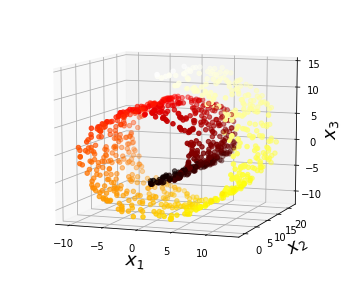

In [ ]:
import matplotlib.pyplot as plt
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

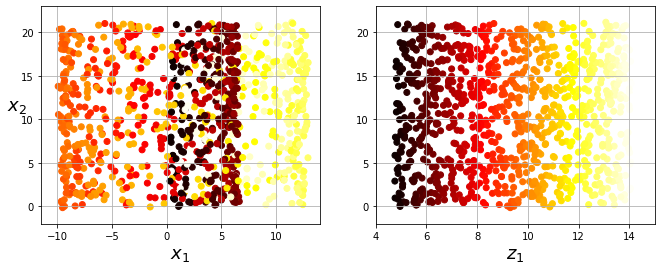

In [ ]:
# 스위치 롤을 펼쳐서 2D 데이터셋을 얻는다.
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

X1(왼쪽 그림) : 평면에 그냥 투영시켜서 뭉개진 것\
X2(오른쪽 그림) : 스위스 롤을 펼쳐놓은 것

# PCA

- 주성분 분석(PCA)은 가장 인기 있는 차원 축소 알고리즘.
- 데이터에 가장 가까운 초평면을 정의한 다음 데이터를 이 평면에 투영시킨다.

**분산 보존**
- 저차원의 초평면에 훈련 세트를 투영하기 전에 먼저 올바른 초평면을 선택해야 한다.

In [ ]:
import numpy as np

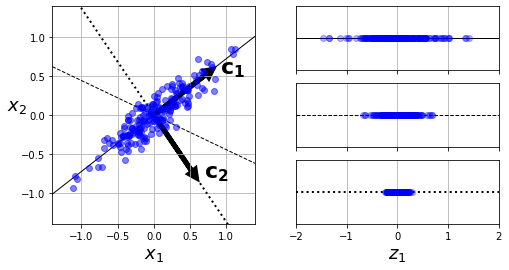

In [ ]:
angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X = np.random.randn(m, 2) / 10
X = X.dot(np.array([[stretch, 0],[0, 1]])) # stretch
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # rotate

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi/6), np.sin(angle - 2 * np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])

X_proj1 = X.dot(u1.reshape(-1, 1))
X_proj2 = X.dot(u2.reshape(-1, 1))
X_proj3 = X.dot(u3.reshape(-1, 1))

plt.figure(figsize=(8,4))
plt.subplot2grid((3,2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k-", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k--", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k:", linewidth=2)
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", fontsize=22)
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", fontsize=22)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot2grid((3,2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=1)
plt.plot(X_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

X1(왼쪽 그림) : 간단한 2D 데이터셋이 세 개의 축(즉, 1차원 초평면)과 함께 표현\
X2(오른쪽 그림) : 데이터셋이 각 축에 투영된 결과
- 실선(C1)에 투영된 것은 분산을 최대로 보존
- 점선에 투영된 것(C2)은 분산을 매우 적게 유지
- 가운데의 파선에 투영된 것은 분산을 중간 정도롤 유지

In [ ]:
# 넘파이 svd() 함수를 사용해 훈련 세트의 모든 주성분을 구한다.
# 그 후 처음 두 개의 PC를 정의하는 두 개의 단위 벡터를 추출한다.
X_centered = X-X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [ ]:
# 사이킷런 PCA 모델을 사용해 데이터셋의 차원을 2로 줄이는 코드
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [ ]:
# explained_variance_ratio_ 변수에 저장된 주성분의 설명된 분산의 비율
pca.explained_variance_ratio_

array([0.95369864, 0.04630136])

- 데이터셋 분산의 95.4%가 첫 번째 PC를 따라 놓여 있고 4.6%가 두 번째 PC를 따라 놓여 있다.

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [ ]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# 차원을 축소하지 않고 PCA를 계산한 뒤 훈련 세트의 분산을 95%로 유지하는데 필요한 최소한의 차원 수를 계산
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [ ]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

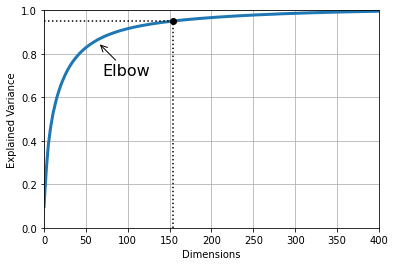

In [ ]:
# 차원 수에 대한 함수로 나타낸 설명된 분산
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)

plt.show()

**압축을 위한 PCA**
- 재구성 오차 : 원본 데이터와 재구성된 데이터(압축 후 원복한 것) 사이의 평균 제곱 거리

In [ ]:
# MNIST 데이터셋을 154차원으로 압축하고 inverse_transform() 메서드를 사용해 784차원으로 복원
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [ ]:
# MNIST 데이터셋을 100개의 미니배치로 나누고
# 사이킷런의 IncrementalPCA 파이썬 클래스에 주입하여 MNIST 데이터셋의 차원을 154개로 줄임
# 전체 훈련세트를 사용하는 fit() 메서드가 아니라 partial_fit() 메서드를 미니배치마다 호출해야 한다.
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="") # 책에는 없음
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

....................................................................................................

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

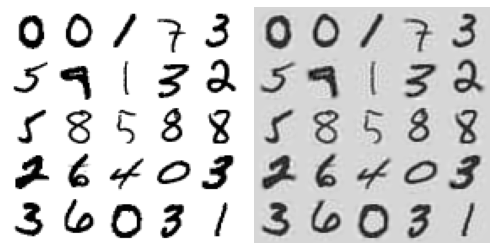

In [ ]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

# 커널 PCA

In [ ]:
# 사이킷런의 KernelPCA를 사용해 RBF 커널로 kPCA를 적용
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

kPCA는 비지도 학습이기 때문에 좋은 커널과 하이퍼파라미터를 선택하기 위한 명확한 성능 측정 기준이 없다. 하지만 차원 축소는 종종 지도 학습의 전처리 단계로 활용되므로 그리드 탐색을 사용하여 주어진 문제에서 성능이 가장 좋은 커널과 하이퍼파라미터를 선택할 수 있다.

In [ ]:
# kPCA를 사용해 차원을 2차원으로 축소하고 분류를 위해 로지스틱 회귀를 적용
# 파이프라인 마지막 단계에서 가장 높은 분류 정확도를 얻기 위해 GridSearchCV를 사용
# kPCA의 가장 좋은 커널과 gamma 파라미터를 찾는다.

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

NameError: ignored

In [ ]:
# 가장 좋은 커널과 하이퍼파라미터는 best_params_ 변수에 저장
print(grid_search.best_params_)

In [ ]:
# 투영된 샘플을 훈련 세트로, 원본 샘플을 타깃으로 하는 지도 학습 회귀 모델을 훈련시킨다.
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)# 자동으로 수행
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [ ]:
# 재구성 원상 오차를 계산
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

# LLE

**LLE(지역 선형 임베딩)**
- 또 다른 강력한 비선형 차원 축소 기술
- 먼저 각 훈련 샘플이 가장 가까운 이웃에 얼마나 선형적으로 연과되어 있는지 측정.
- 그 다음 국부적인 관계가 가장 잘 보존되는 훈련 세트의 저차원 표현을 찾는다.

In [ ]:
# 사이킷런의 LocallyLinearEmbedding을 사용해 스위치 롤을 펼친다.
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

In [ ]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

plt.show()